In [9]:
from scripts2 import project_functions
df = project_functions.load_and_process('../../data/raw/nomenclature.csv')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df.head()


,index,Planet Name,ID,FeatureName,FeatureType,Planetary Feature,Latitude of Center of Planetary Feature,Longitude of Center of Planetary Feature,Size of Planetary Feature(km)
0,1357,Mars,4574.0,Pandorae Fretum,albedo feature,AL,-24.741878,44.0,0.0
1,1459,Mars,6596.0,Xanthe,albedo feature,AL,9.884955,310.0,0.0
2,1168,Mars,2132.0,Gehon,albedo feature,AL,14.831743,360.0,0.0
3,1462,Mars,6639.0,Yaonis Regio,albedo feature,AL,-39.667248,40.0,0.0
4,1165,Mars,4213.0,Nereidum Fretum,albedo feature,AL,-44.661768,305.0,0.0


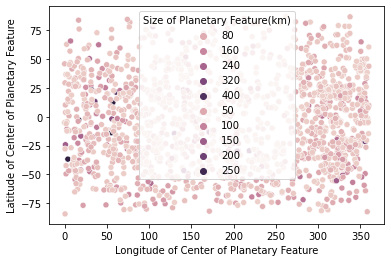

In [11]:
marsdata = df[df['Planet Name'] == "Mars"]
marscraterdata = marsdata[marsdata['FeatureType'] == ' crater '] 

sns.scatterplot(data = marscraterdata, y='Latitude of Center of Planetary Feature',x='Longitude of Center of Planetary Feature',hue='Size of Planetary Feature(km)')
venusdata = df[df['Planet Name'] == "Venus"]


venuscraterdata = venusdata[venusdata['FeatureType'] == ' crater '] 

sns.scatterplot(data = venuscraterdata, y='Latitude of Center of Planetary Feature',x='Longitude of Center of Planetary Feature',hue='Size of Planetary Feature(km)')


names = df['Planet Name']



#venusdata
#plt.xlabel("Longitude", size=20)
#plt.ylabel("Latitude", size=20)

In [12]:
a = df['Planet Name'].unique()
a

array(['Mars', 'Moon', 'Titan', 'Mercury', 'Dione', 'Rhea', 'Ganymede',
       'Ceres', 'Callisto', 'Triton', 'Mimas', 'Vesta', 'Europa', 'Pluto',
       'Venus', 'Ariel', 'Tethys', 'Oberon', 'Charon', 'Titania',
       'Miranda', 'Steins', 'Enceladus', 'Phobos', 'Eros', 'Epimetheus',
       'Iapetus', 'Amalthea', 'Thebe', 'Gaspra', 'Puck', 'Lutetia',
       'Deimos', 'Phoebe', 'Janus', 'Proteus', 'Hyperion', 'Ida',
       'Mathilde', 'Umbriel', 'Dactyl', 'Itokawa', 'Ryugu', 'Io', 'Bennu'],
      dtype=object)

<AxesSubplot:xlabel='Longitude of Center of Planetary Feature', ylabel='Latitude of Center of Planetary Feature'>

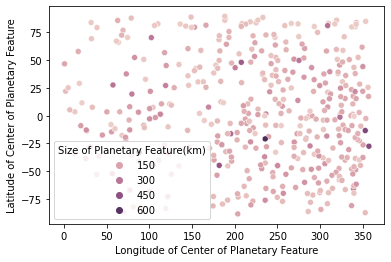

In [13]:
mercurydata = df[df['Planet Name'] == "Mercury"]
mercurycraterdata = mercurydata[mercurydata['FeatureType'] == ' crater '] 

sns.scatterplot(data = mercurycraterdata, y='Latitude of Center of Planetary Feature',x='Longitude of Center of Planetary Feature',hue='Size of Planetary Feature(km)')
 

In [14]:
a = df['Planet Name'].unique()
for i in a:
  
    test = df[df['Planet Name'] ==i]
    test2 = test[test['FeatureType'] == ' crater '].size
    if test2 > 1000:
        print(test2)
        print(i)

10143
Mars
14202
Moon
3744
Mercury
1152
Rhea
1161
Ganymede
1035
Ceres
1269
Callisto
7929
Venus


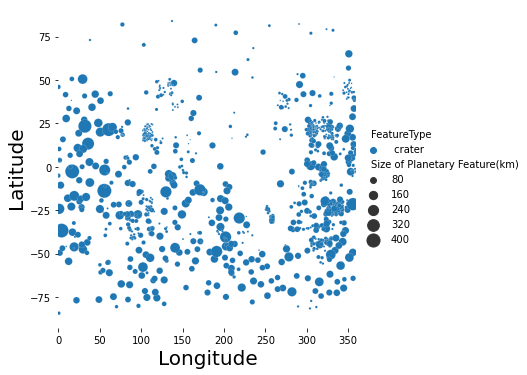

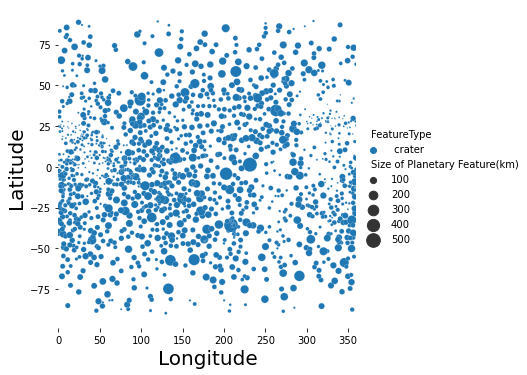

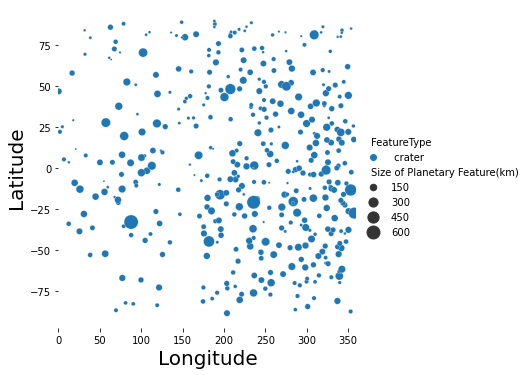

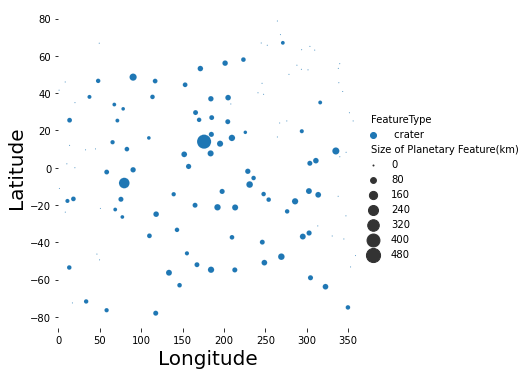

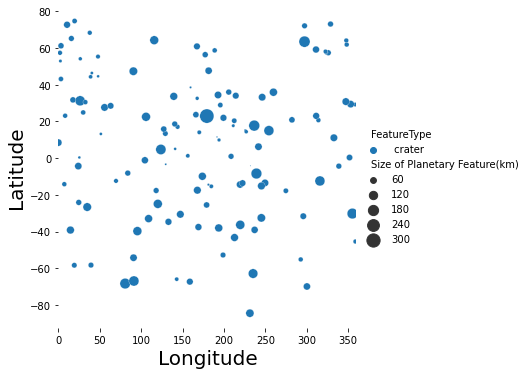

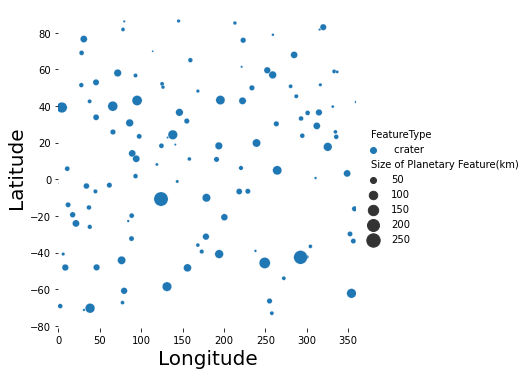

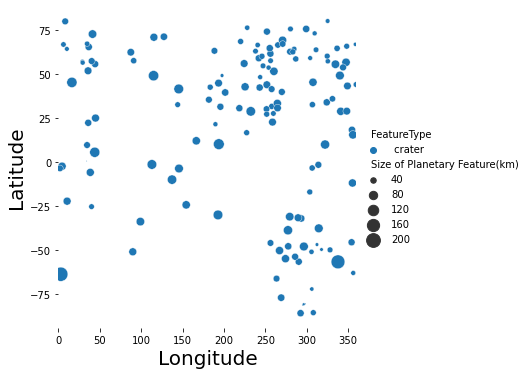

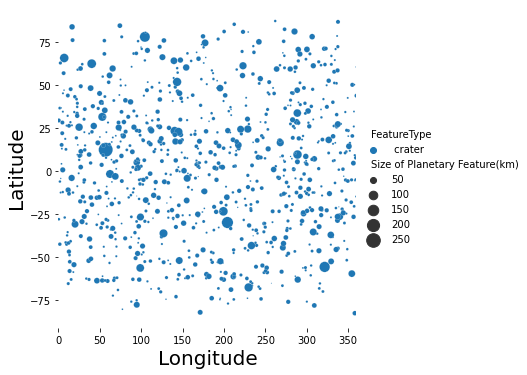

In [15]:
a = df['Planet Name'].unique()
for i in a:
    test = df[df['Planet Name'] ==i]
    test2 = test[test['FeatureType'] == ' crater '] 
  
    test3 = test[test['FeatureType'] == ' crater '].size 
    
    if test3 > 1000:  
        c = sns.color_palette("flare", as_cmap=True)
    
        moon_feat_size_map = sns.relplot(
        data=test2,
        y="Latitude of Center of Planetary Feature", x="Longitude of Center of Planetary Feature",
        hue="FeatureType", size="Size of Planetary Feature(km)",
        sizes=(1, 200))
        moon_feat_size_map.set(xlim=(0, 360))
        moon_feat_size_map.ax.xaxis.grid(True, "minor", linewidth=.25)
        moon_feat_size_map.ax.yaxis.grid(True, "minor", linewidth=.25)
        moon_feat_size_map.set_xlabels("Longitude", size=20)
        moon_feat_size_map.set_ylabels("Latitude", size=20)
        moon_feat_size_map.despine(left=True, bottom=True)
  


In [16]:
marsdata = df[df['Planet Name'] == "Mars"]
marscraterdata = marsdata[marsdata['FeatureType'] == ' crater '] 
model = LinearRegression(normalize = True)
x=marscraterdata["Latitude of Center of Planetary Feature"].iloc[:300].to_numpy().reshape(1, -1)
y=marscraterdata["Size of Planetary Feature(km)"].iloc[:300].to_numpy().reshape(1, -1)
x1=venuscraterdata["Latitude of Center of Planetary Feature"].iloc[:300].to_numpy().reshape(1, -1)
y1=venuscraterdata["Size of Planetary Feature(km)"].iloc[:300].to_numpy().reshape(1, -1)
model.fit(x,y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
y_pred = model.intercept_ + model.coef_ * x1
print('predicted response:', y_pred, sep='\n')
r_sq = model.score(x1, y)
print('coefficient of determination:', r_sq)

intercept: [106.948     6.32815  10.7481   13.308   136.664     4.0782   11.2411
  18.938    51.8436  165.182   172.558     2.16059  42.2626   69.6983
 109.959    18.4667   52.1702   26.6012   84.2698   13.6976   63.7445
  60.3092   30.5515   21.3771   32.8955    6.94529  12.3335   90.6889
   9.85309 103.989     9.35281 116.149    34.6093   54.8151    4.52639
   6.90412   9.18118 124.159    51.6213   72.9764  115.992     9.02902
   7.14884  32.3741   25.4393   94.2108   82.8233   75.7484   92.4911
  19.8665   31.1314   30.1158   96.3463   25.0782    2.75796  62.2137
   3.42113   9.51923  11.6272   15.8997    5.05154 115.197     2.40453
  10.0235  185.453     1.64523   3.41758  11.137     7.293    74.3284
 127.137   109.725    16.8882   14.7236   13.1364    6.6656   30.299
  17.6349   16.7125   69.4569    4.05995  99.9164   35.5776    6.69837
   3.19537  20.6389  223.407    22.1835    8.99866   3.32702  23.8974
 161.368     6.49407  62.7355   12.0598   63.5364  103.537    22.991
   8.09

C:\Users\Danie\miniconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [25]:
from sklearn.model_selection import train_test_split
x2=marscraterdata["Latitude of Center of Planetary Feature"].to_numpy().reshape(1, -1)
y2=marscraterdata["Longitude of Center of Planetary Feature"].to_numpy().reshape(1, -1)
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.20,train_size=0.80)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: With n_samples=1, test_size=0.2 and train_size=0.8, the resulting train set will be empty. Adjust any of the aforementioned parameters.